In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [2]:
df=pd.read_csv('bankloan.csv')
df=df.dropna()
df.isna().any() #checking Na
df=df.drop('Loan_ID', axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])
#Counter(df['Loan_Status']) ['Y']/df['Loan_Status'].size

Counter({'N': 148, 'Y': 332})

In [3]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71000,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40000,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253000,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187000,360.0,1.0,Urban,Y


In [4]:
pre_y=df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)
dm_X=pd.get_dummies(pre_X)
dm_y=pre_y.map(dict(Y=1, N=0))
pre_y.shape

(480,)

In [5]:
dm_X.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
6,0.0,2333,1516.0,95000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
7,3.0,3036,2504.0,158000,360.0,0.0,0,1,0,1,1,0,1,0,0,1,0
8,2.0,4006,1526.0,168000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
9,1.0,12841,10968.0,349000,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
10,2.0,3200,700.0,70000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [6]:
savingToExcel=dm_X.head(20)
savingToExcel.to_excel('Test_loan.xlsx')

In [7]:
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_resample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)
Counter(y)

Counter({0: 332, 1: 332})

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [9]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
classifier.fit(X_train, y_train, batch_size=20, epochs=50, verbose=0)

In [11]:
eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 1ms/step - loss: 0.2566 - accuracy: 0.9040


[0.2565876841545105, 0.903954803943634]

In [12]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred>0.5)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

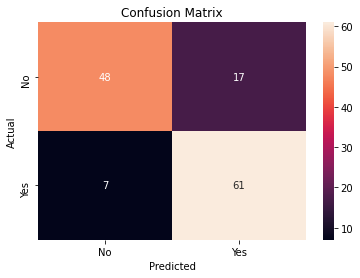

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);

#labels
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

In [14]:
classifier.save('loan_predict.h5')

# KFold

In [15]:
from sklearn.model_selection import StratifiedKFold

In [16]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
cvscores = []
for train, test in kfold.split(X, y):
    classifier1 = Sequential()
    classifier1.add(Dense(200, activation='relu', input_dim=17))
    classifier1.add(Dense(400, activation='relu'))
    classifier1.add(Dense(4, activation='relu'))
    classifier1.add(Dense(1, activation='sigmoid'))
    
    classifier1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    classifier1.fit(X[train], y[train], batch_size=10, epochs=50, verbose=0)
                   
    scores = classifier1.evaluate(X[train], y[train])
                
    cvscores.append(scores[1] * 100)


14/14 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9233
